In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('data/spotify.csv')

# 1. Exploratory Data Analysis (EDA)

In [5]:
# View the dataset
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [6]:
# Summary statistics for numerical features
df.describe()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
# Check for missing values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [9]:
# Drop null values
df.dropna(subset=['key', 'in_shazam_charts'], inplace=True)

# Check num of null values 
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
cover_url               0
dtype: int64

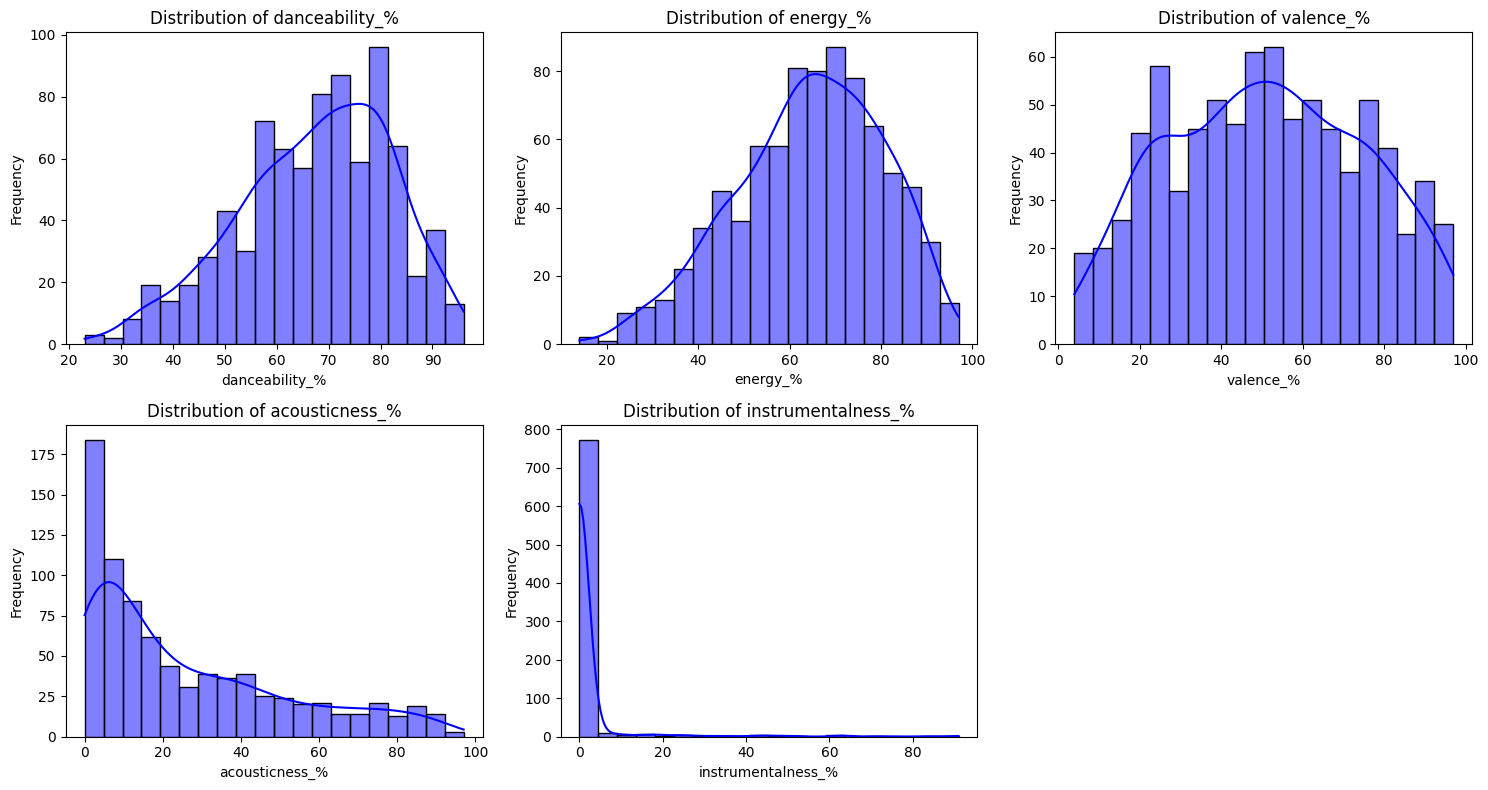

In [11]:
## Understanding the distribution of key features

features_to_plot = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%']
plt.figure(figsize=(15, 8))
for i, column in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color="blue", bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
correlation_matrix = df[['danceability_%', 'energy_%', 'streams']].corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()

ValueError: could not convert string to float: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

<Figure size 800x500 with 0 Axes>

In [13]:
# Check column data types
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object

In [14]:
# Convert 'streams' to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Check that 'streams' is now numeric
df['streams'].dtype


dtype('float64')

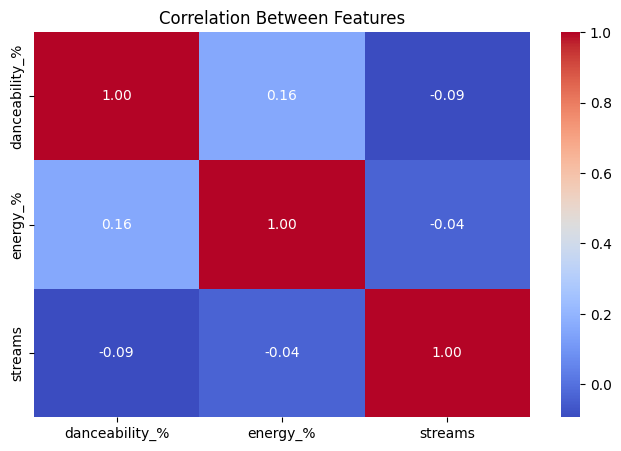

In [15]:
# Generate the heatmap again with fewer features
plt.figure(figsize=(8, 5))
correlation_matrix = df[['danceability_%', 'energy_%', 'streams']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()


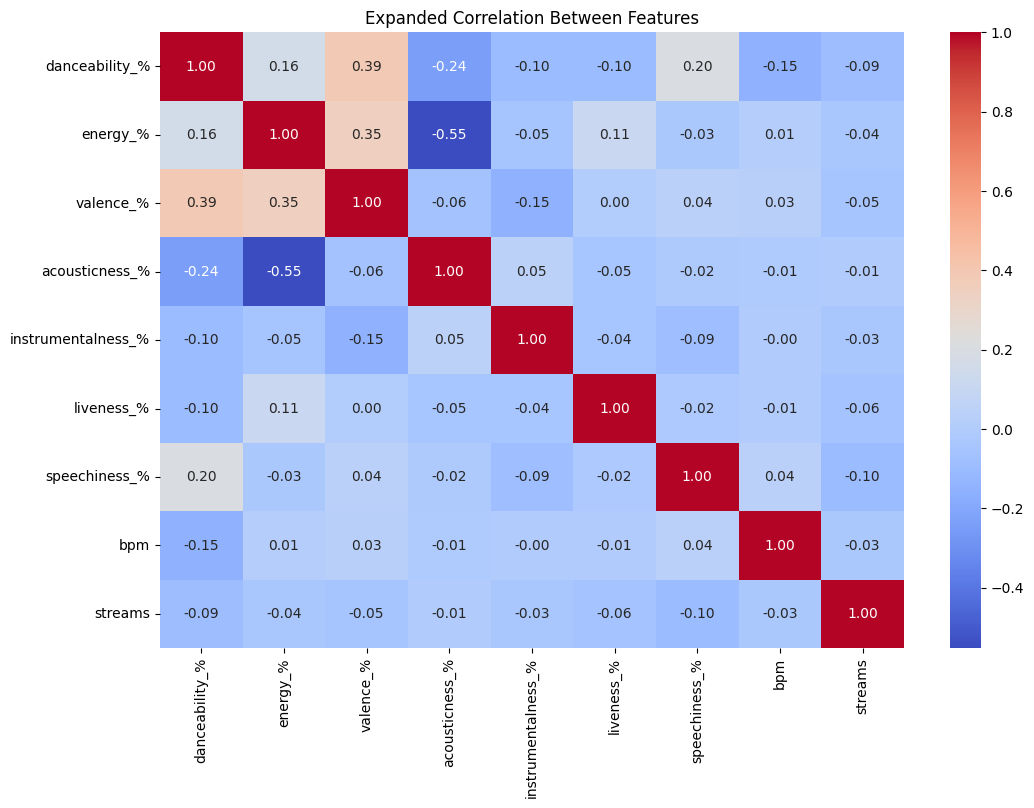

In [16]:
numerical_columns = [
    'danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm', 'streams'
]

# Ensure all columns are numeric (clean and convert as needed)
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Generate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Expanded Correlation Between Features')
plt.show()


# Modeling

cluster
1    472
2    209
0    136
Name: count, dtype: int64


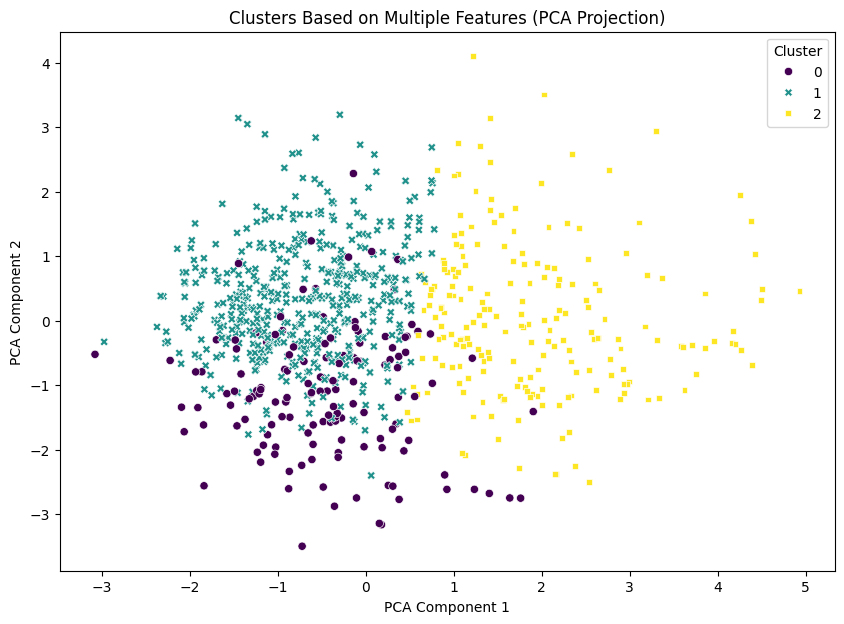

In [20]:
features_for_clustering = [
    'danceability_%', 'energy_%', 'valence_%',
    'acousticness_%', 'instrumentalness_%', 'bpm', 'speechiness_%', 'liveness_%'
]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_clustering])


kmeans = KMeans(n_clusters=3, random_state=50) 
df['cluster'] = kmeans.fit_predict(X_scaled) 

# Cluster sizes
print(df['cluster'].value_counts())

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', style=df['cluster'])
plt.title('Clusters Based on Multiple Features (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [21]:
# Calculate mean values of features per cluster
df.groupby('cluster')[features_for_clustering].mean()


,danceability_%,energy_%,valence_%,acousticness_%,instrumentalness_%,bpm,speechiness_%,liveness_%
cluster,,,,,,,,
0,74.080882,63.044118,50.632353,24.441176,0.080882,127.558824,30.279412,17.250000
1,71.048729,71.983051,59.237288,15.565678,0.531780,121.326271,6.781780,18.885593
2,54.779904,48.009569,33.425837,51.789474,5.301435,122.114833,6.129187,17.148325


/var/folders/dt/0bnsl48d14n491d2_r6d8fvw0000gn/T/ipykernel_1070/4260897043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
/var/folders/dt/0bnsl48d14n491d2_r6d8fvw0000gn/T/ipykernel_1070/4260897043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
/var/folders/dt/0bnsl48d14n491d2_r6d8fvw0000gn/T/ipykernel_1070/4260897043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
/var/folders/dt/0bn

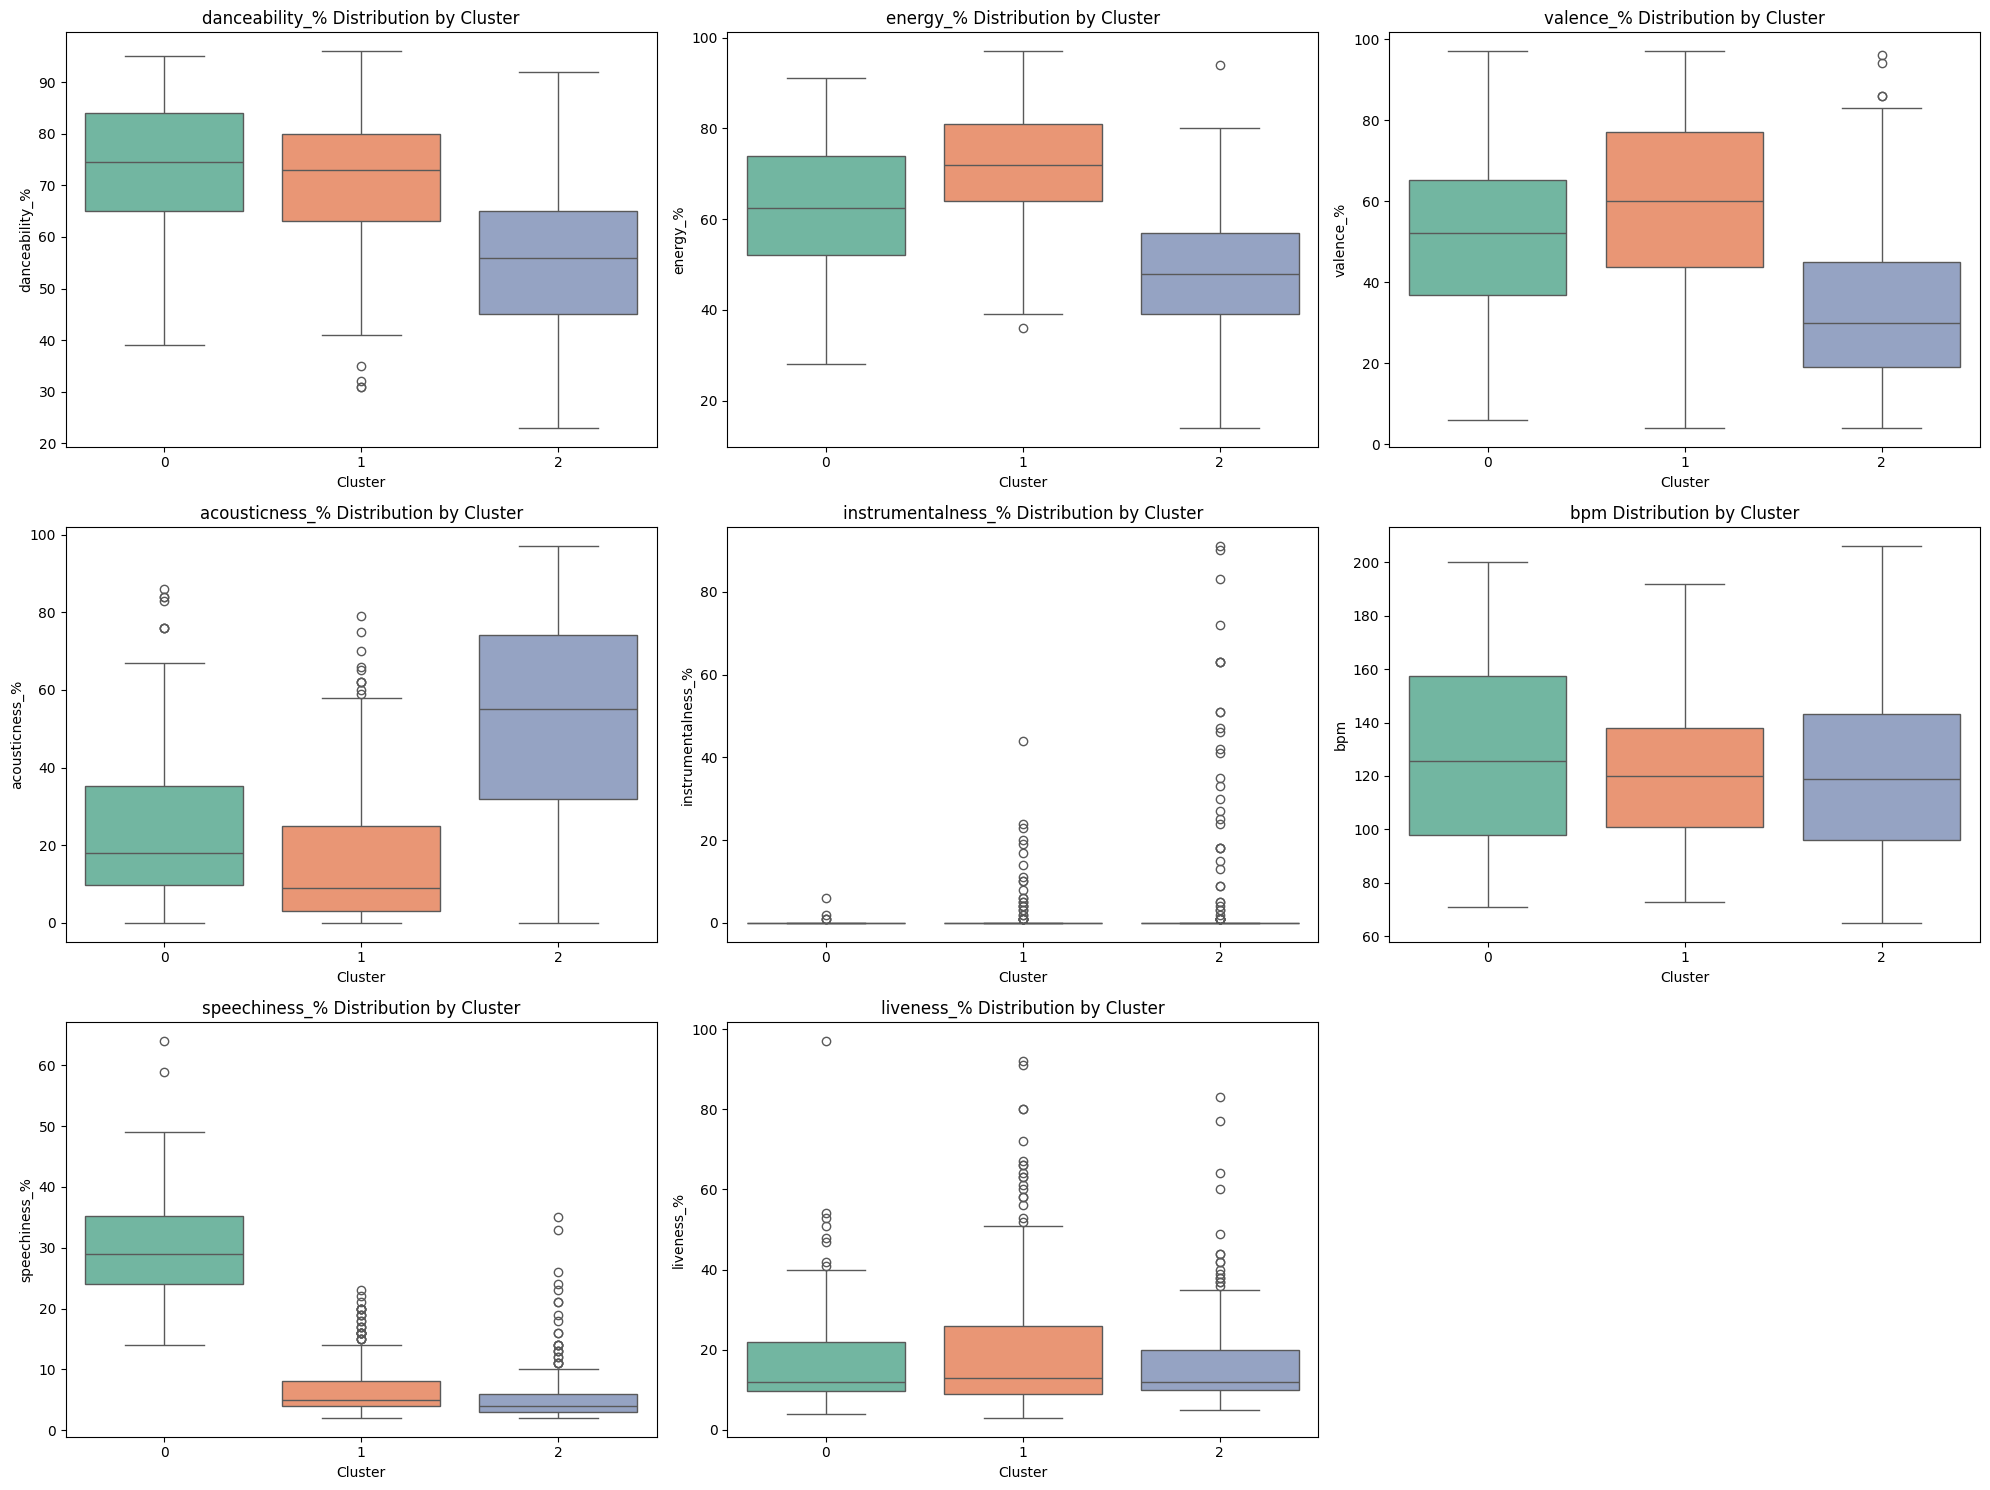

In [22]:
# Create boxplots for each feature grouped by clusters
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_for_clustering, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()
